In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
##Importing dataframe

In [3]:
path = r'C:\Users\Janvi\Documents\09-2024 Instacart Basket Analysis'

In [13]:
ords_prods_merge = pd.read_pickle(r'C:\Users\Janvi\Documents\09-2024 Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_merge.pkl')

In [37]:
##2. bar chart

<Axes: xlabel='order_dow'>

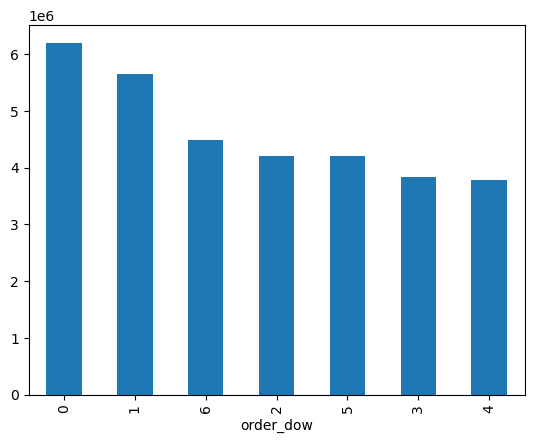

In [23]:
ords_prods_merge['order_dow'].value_counts().plot.bar()

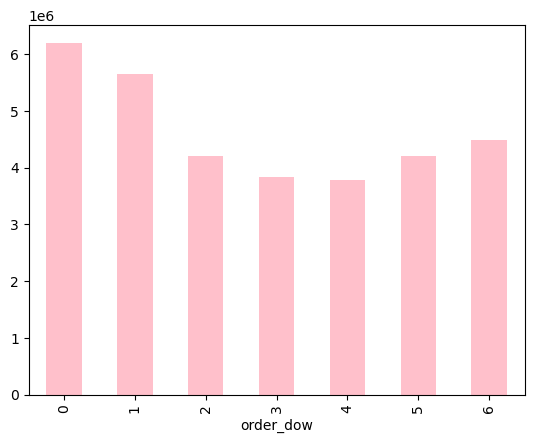

In [33]:
bar = ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar(color = ['pink'])

In [29]:
ords_prods_merge['order_dow'].value_counts()

order_dow
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [35]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [39]:
##3. Histogram

<Axes: ylabel='Frequency'>

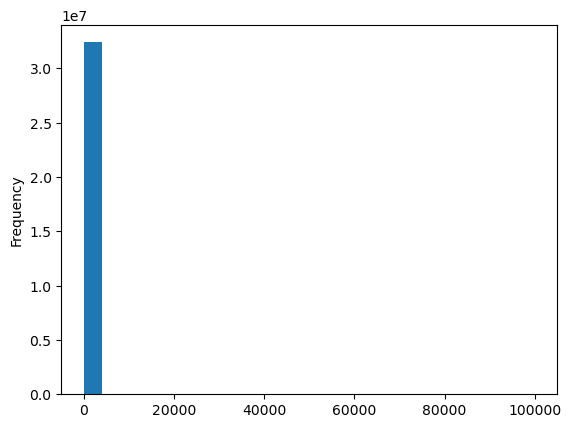

In [41]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [43]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [45]:
ords_prods_merge['prices'].mean()

11.980225638383468

In [47]:
ords_prods_merge['prices'].max()

99999.0

In [55]:
##4. Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

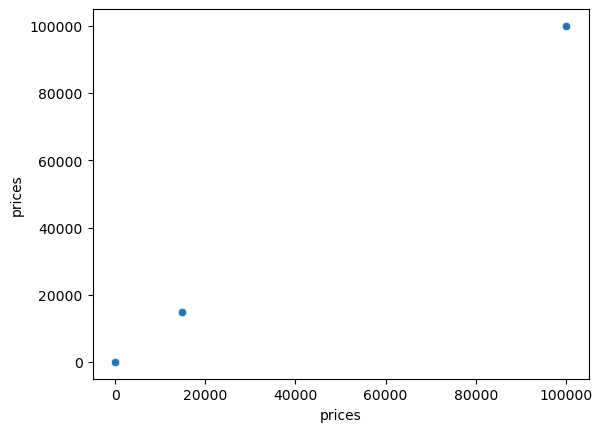

In [49]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [53]:
ords_prods_merge.loc[ords_prods_merge['prices']>100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge
13100147,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,prior,12,2,14,5.0,5,0,both
13100148,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,prior,22,6,16,4.0,3,1,both
13100149,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,prior,2,2,21,13.0,6,0,both
13100150,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,prior,3,0,8,12.0,3,1,both
13100151,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,prior,8,1,19,30.0,9,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786876,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,prior,29,0,8,4.0,1,0,both
21786877,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,prior,31,0,9,2.0,1,1,both
21786878,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,prior,13,3,15,8.0,25,0,both
21786879,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,prior,7,3,20,4.0,8,0,both


In [ ]:
##assigning as NaN value

In [57]:
ords_prods_merge.loc[ords_prods_merge['prices']>100] = np.nan

In [59]:
ords_prods_merge['prices'].max()

25.0

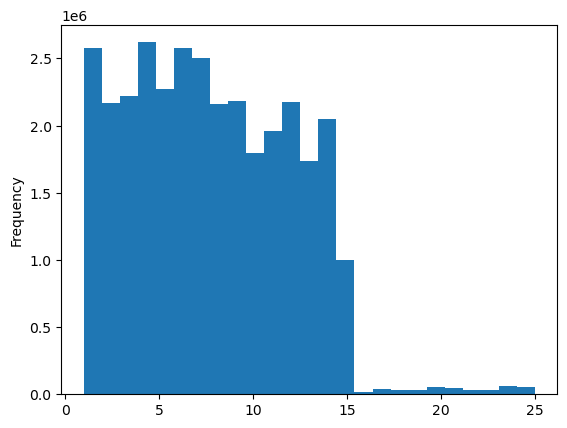

In [63]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

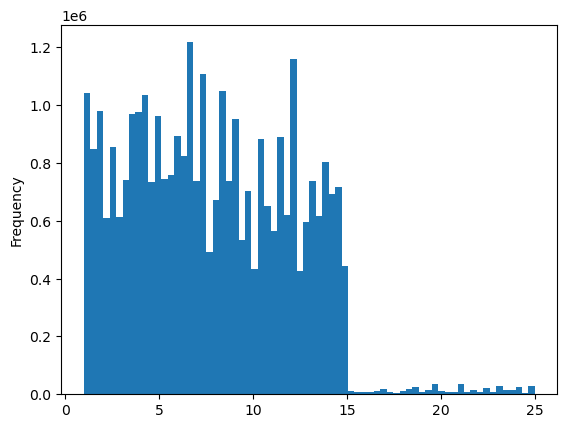

In [65]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [67]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices.png'))

In [69]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [71]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [73]:
##create list using true or false value

dev= np.random.rand(len(ords_prods_merge)) <= 0.7

In [75]:
#store 70% in big df
big = ords_prods_merge[dev]

In [77]:
#store 30% in smalldf
small = ords_prods_merge[~dev]

In [81]:
len(ords_prods_merge)

32404859

In [83]:
len(big)+len(small)

32404859

In [89]:
##This creates a new dataframe, df_2, that contains only the “prices” and “orders_day_of_week” columns from your small subset.
df_2 = small[['order_dow','prices']]

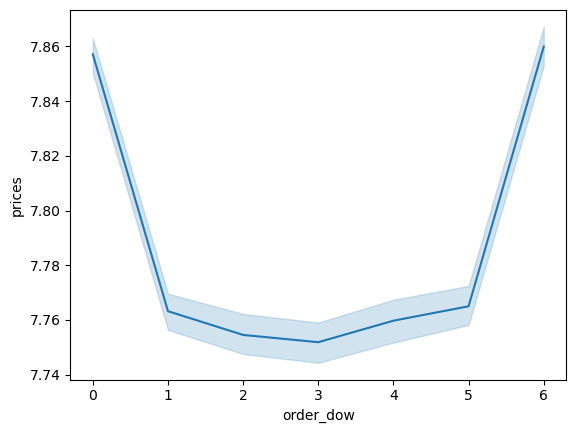

In [91]:
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

In [93]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices.png'))